### MNIST Handwritten Digit Classification using Artificial Neural Networks (ANN)




In [101]:
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

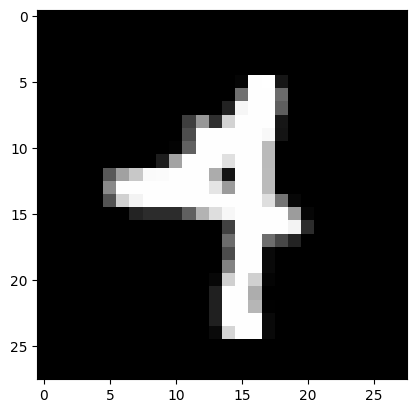

In [5]:
plt.imshow(X_train[23435].reshape(28,28), cmap = plt.get_cmap("gray"))

In [6]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the numbere of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labesl"
assert(X_train.shape[1:] == (28, 28)), "The dimensions of the images are not 28 x 28"
assert(X_test.shape[1:] == (28, 28)), "The dimensions of the images are not 28 x 28"

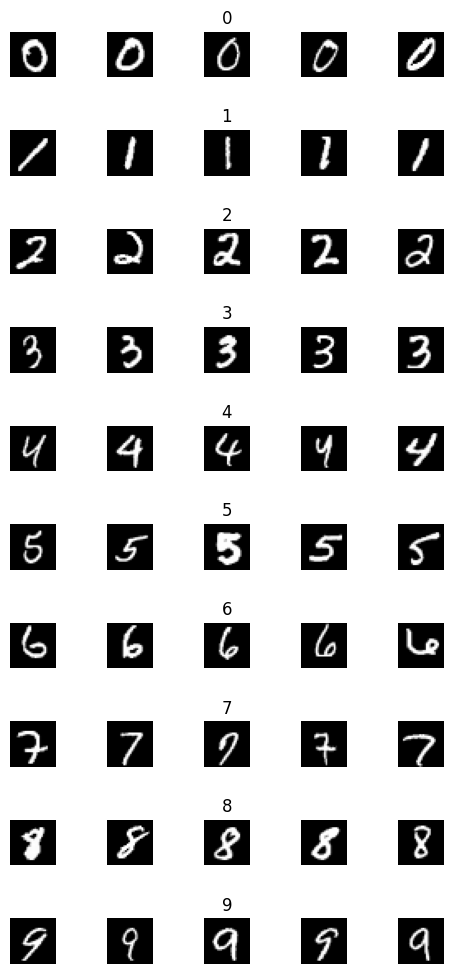

In [7]:
num_of_samples = []
cols = 5
num_classes = 10
fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize = (5,10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,len(x_selected-1)), :, :],
                         cmap = plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

Text(0, 0.5, 'Number of images')

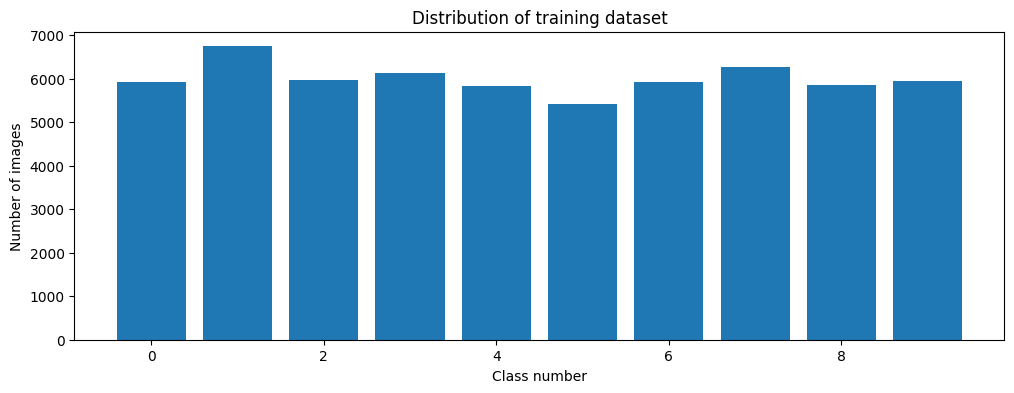

In [8]:
num_of_samples
plt.figure(figsize = (12,4))
plt.bar(range(0,num_classes), num_of_samples)
plt.title("Distribution of training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [9]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
num_pixels = 28 * 28
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [12]:
X_train.shape

(60000, 784)

In [13]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim = num_pixels, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(10, activation = 'softmax'))   # whenerver you have more than one output node use softmax
    lr = 0.01
    adam = Adam(lr)
    model.compile(adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [14]:
model = create_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,070 (31.52 KB)

 Trainable params: 8,070 (31.52 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(X_train, y_train, epochs = 15 , validation_split=0.1, batch_size = 200, shuffle = 1)

Epoch 1/15
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6881 - loss: 0.9308 - val_accuracy: 0.9232 - val_loss: 0.2621
Epoch 2/15
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9131 - loss: 0.3037 - val_accuracy: 0.9395 - val_loss: 0.2072
Epoch 3/15
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9236 - loss: 0.2633 - val_accuracy: 0.9270 - val_loss: 0.2500
Epoch 4/15
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9292 - loss: 0.2471 - val_accuracy: 0.9382 - val_loss: 0.2050
Epoch 5/15
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9300 - loss: 0.2398 - val_accuracy: 0.9368 - val_loss: 0.2200
Epoch 6/15
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9336 - loss: 0.2279 - val_accuracy: 0.9415 - val_loss: 0.1991
Epoch 7/15
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9354 - loss: 0.2191 - val_accuracy: 0.9455 - val_loss: 0.1915
Epoch 8/15
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9349 - loss: 0.2243 - val_accuracy: 0.

Text(0.5, 0, 'Epochs')

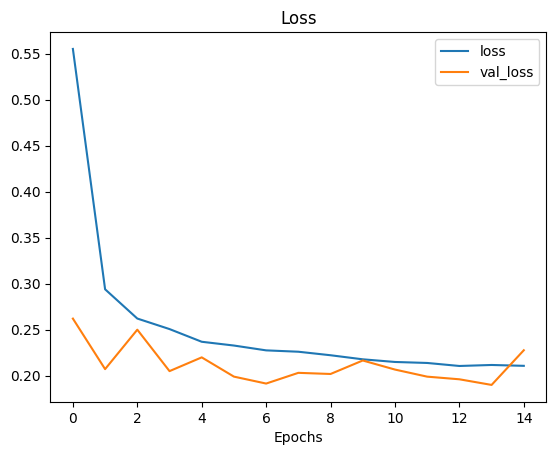

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["loss", "val_loss"])
plt.title('Loss')
plt.xlabel("Epochs")

Text(0.5, 0, 'Epochs')

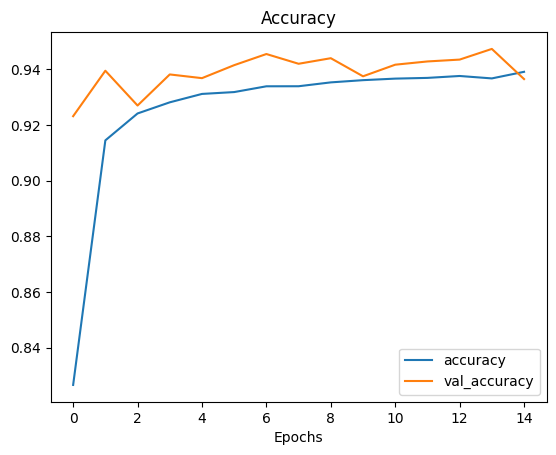

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["accuracy", "val_accuracy"])
plt.title('Accuracy')
plt.xlabel("Epochs")

In [18]:
score = model.evaluate(X_test, y_test, verbose = 0)
print(type(score))
print("Test_score:", score[0])
print("Test_accuracy:", score[1])

<class 'list'>
Test_score: 0.26437830924987793
Test_accuracy: 0.9286999702453613


In [19]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [20]:
y_pred = y_prob.argmax(axis = 1)
y_test_reverted = np.argmax(y_test, axis=1)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test_reverted)

0.9287

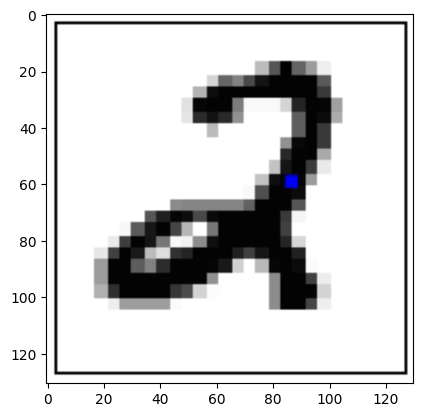

In [67]:
#import requests
from PIL import Image
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

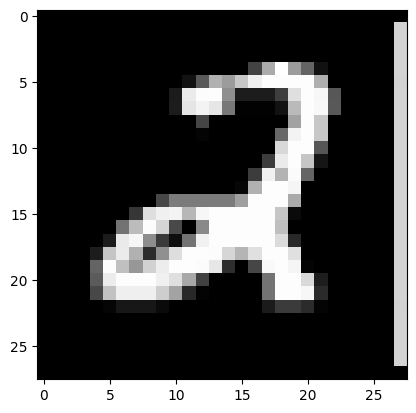

In [68]:
import cv2
img_array = np.asarray(img)
resized = cv2.resize(img_array, (28,28))
grey_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(grey_scale)
plt.imshow(image, cmap = plt.get_cmap("gray"))

In [69]:
image = image/255
image = image.reshape(1, 784)
print(f"predicted_digit is :",model.predict(image).argmax(axis = 1)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
predicted_digit is : 2


### MNIST Handwritten Digit Classification using Convolutional Neural Networks (CNN)

In [102]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [103]:
X_train.shape

(60000, 28, 28)

In [104]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the numbere of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labesl"
assert(X_train.shape[1:] == (28, 28)), "The dimensions of the images are not 28 x 28"
assert(X_test.shape[1:] == (28, 28)), "The dimensions of the images are not 28 x 28"

In [105]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [106]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [107]:
X_train = X_train / 255
X_test = X_test / 255

In [146]:
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30, (5,5), input_shape = (28, 28, 1), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Conv2D(15,(3,3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Flatten())
  model.add(Dense(500, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation = 'softmax'))
  model.compile(Adam(learning_rate= 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [147]:
model = leNet_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 24, 24, 30)          │             780 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 12, 12, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 10, 10, 15)          │           4,065 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 5, 5, 15)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 375)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 500)                 │         188,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197,855 (772.87 KB)

 Trainable params: 197,855 (772.87 KB)

 Non-trainable params: 0 (0.00 B)

In [110]:
history = model.fit(X_train, y_train, epochs = 10, validation_split = 0.1, batch_size = 400, shuffle = 1, verbose = 1)

Epoch 1/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8252 - loss: 0.5138 - val_accuracy: 0.9863 - val_loss: 0.0471
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9782 - loss: 0.0701 - val_accuracy: 0.9890 - val_loss: 0.0379
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9819 - loss: 0.0585 - val_accuracy: 0.9893 - val_loss: 0.0422
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9848 - loss: 0.0446 - val_accuracy: 0.9868 - val_loss: 0.0533
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9869 - loss: 0.0407 - val_accuracy: 0.9882 - val_loss: 0.0418
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9879 - loss: 0.0382 - val_accuracy: 0.9912 - val_loss: 0.0335
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9882 - loss: 0.0375 - val_accuracy: 0.9895 - val_loss: 0.0380
Epoch 8/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9892 - loss: 0.0366 - val_accuracy: 0

Text(0.5, 0, 'Epochs')

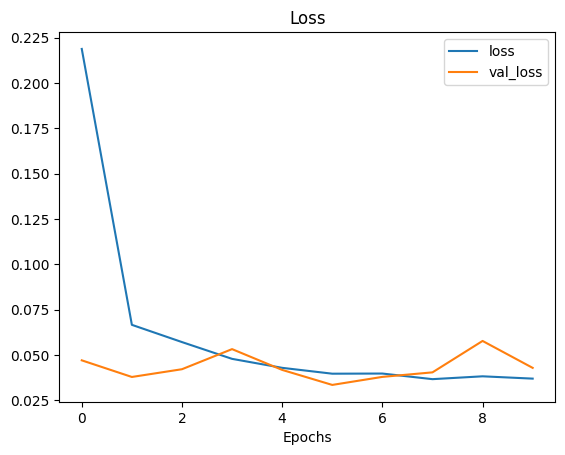

In [111]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["loss", "val_loss"])
plt.title('Loss')
plt.xlabel("Epochs")

Text(0.5, 0, 'Epochs')

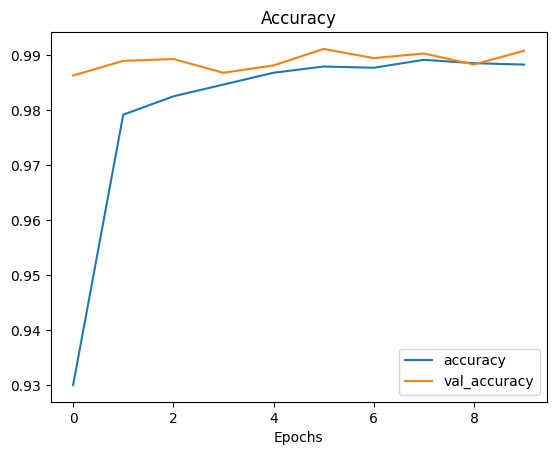

In [112]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["accuracy", "val_accuracy"])
plt.title('Accuracy')
plt.xlabel("Epochs")

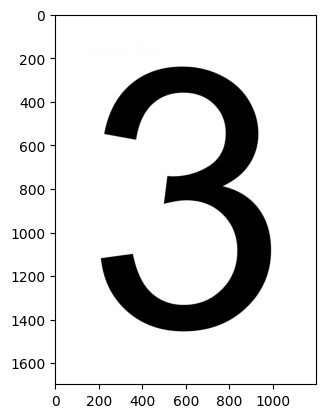

In [135]:
import requests
from PIL import Image
url = 'https://printables.space/files/uploads/download-and-print/large-printable-numbers/3-a4-1200x1697.jpg'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

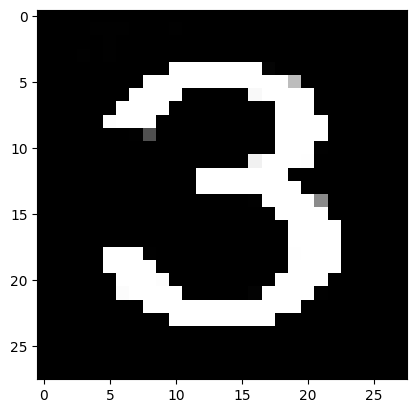

In [136]:
import cv2
img_array = np.asarray(img)
resized = cv2.resize(img_array, (28,28))
grey_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(grey_scale)
plt.imshow(image, cmap = plt.get_cmap("gray"))

In [137]:
image = image/255
image = image.reshape(1,28,28,1)
print(f"predicted_digit is :",model.predict(image).argmax(axis = 1)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
predicted_digit is : 3


In [116]:
score = model.evaluate(X_test, y_test, verbose = 0)
print(type(score))
print("Test_score:", score[0])
print("Test_accuracy:", score[1])

<class 'list'>
Test_score: 0.03658114746212959
Test_accuracy: 0.9886000156402588


In [117]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [118]:
y_pred = y_prob.argmax(axis = 1)
y_test_reverted = np.argmax(y_test, axis=1)

In [119]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test_reverted)

0.9886

In [152]:
layer1 = Model(inputs = model.layers[0].input, outputs = model.layers[0].output)
layer2 = Model(inputs = model.layers[0].input, outputs = model.layers[2].output)
visual_layer1 = layer1.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


In [153]:
visual_layer2 = layer2.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


In [155]:
visual_layer2.shape

(1, 10, 10, 15)

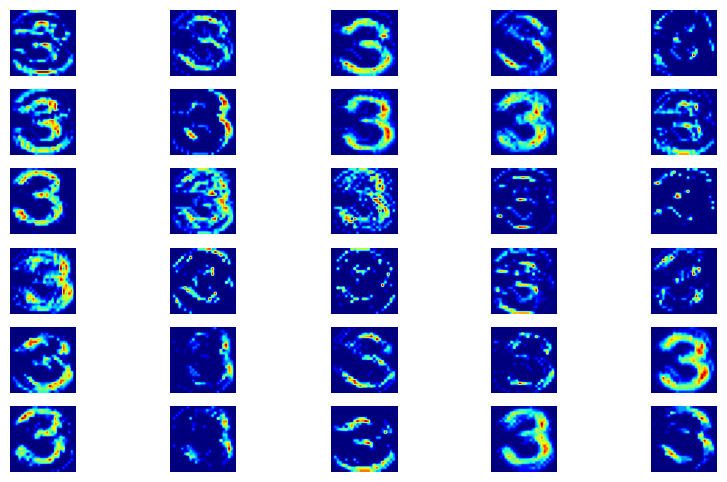

In [157]:
plt.figure(figsize = (10,6))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.imshow(visual_layer1[0,:,:,i], cmap = plt.get_cmap('jet'))
    plt.axis('off')

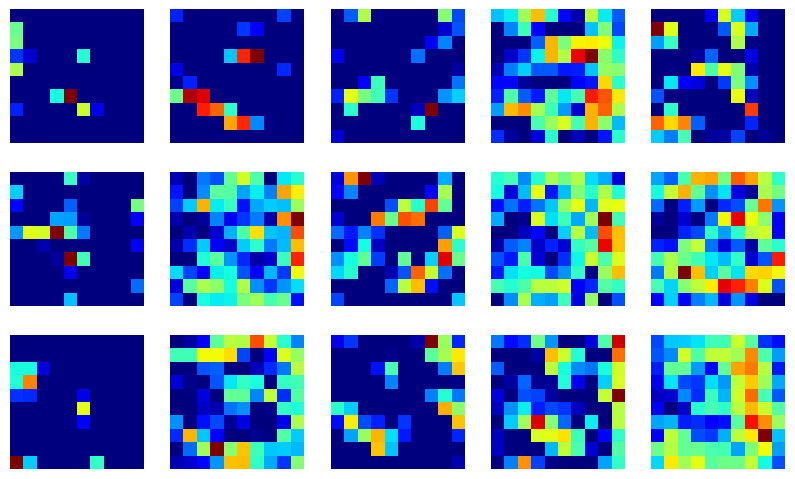

In [159]:
plt.figure(figsize = (10,6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(visual_layer2[0,:,:,i], cmap = plt.get_cmap('jet'))
    plt.axis('off')